Number of projects: 6
Number of unique commits: 29
Number of unique cache tuples: 29
Number of executed proofs: 4477
Number of successfully executed sentences: 49939
Number of compiled files: 189
Maximum total open goal count: 17


<AxesSubplot: >

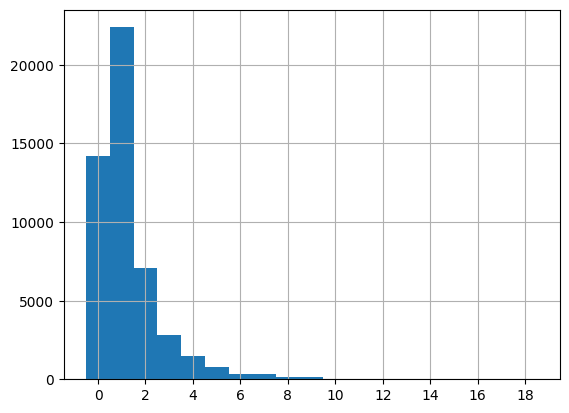

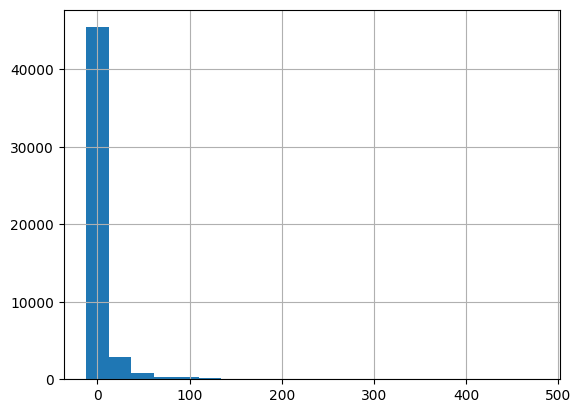

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../../base_df.csv")
# Count projects
print("Number of projects:", len(df[["project name"]].drop_duplicates()))
# Count unique commits
print("Number of unique commits:", len(df[["project name", "commit hash"]].drop_duplicates()))
# Count cache tuples
print("Number of unique cache tuples:", len(df[["project name", "commit hash", "coq version"]].drop_duplicates()))
# Count executed proofs
df1 = df[["project name", "commit hash", "coq version", "filename", "command index", "proof index"]]
df1_proofs_only = df1[df1["proof index"] != 0]
print("Number of executed proofs:", len(df1_proofs_only.drop_duplicates()))
# Count successfully executed sentences
print("Number of successfully executed sentences:", len(df))
# Count compiled files
df3 = df[["project name", "commit hash", "coq version", "filename"]]
print("Number of compiled files:", len(df3.drop_duplicates()))
# Get max open goals and histogram of open goals
df["total goal count"] = df["foreground goal count"] + df["background goal count"] + df["abandoned goal count"] + df["shelved goal count"]
print("Maximum total open goal count:", df["total goal count"].max())
fig = plt.figure()
(df[df["total goal count"] > -1]["total goal count"]).hist(bins=range(20), align="left")
ax = fig.axes[0]
ax.set_xticks(range(0, 20, 2))
# Get histogram of open hypotheses
plt.figure()
df["total hypothesis count"] = df["foreground hypothesis count"] + df["background hypothesis count"] + df["abandoned hypothesis count"] + df["shelved hypothesis count"]
(df[df["total hypothesis count"] > -1]["total hypothesis count"]).hist(bins=20, align="left")